# Libraries imports:

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Dataset Overview:

In [19]:
df = pd.read_csv('HRDataset.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [20]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [68]:
df.shape

(45607, 21)

In [21]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# Data Cleaning:

In [22]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [23]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [24]:
df.drop(['employee_id','region','recruitment_channel'],axis=1 ,inplace= True)

In [25]:
df.rename(columns={'awards_won?':'awards_won'}, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             52399 non-null  object 
 2   gender                54808 non-null  object 
 3   no_of_trainings       54808 non-null  int64  
 4   age                   54808 non-null  int64  
 5   previous_year_rating  50684 non-null  float64
 6   length_of_service     54808 non-null  int64  
 7   awards_won            54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.2+ MB


In [27]:
df.isna().sum()

department                 0
education               2409
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [33]:
sum(df.duplicated())

0

In [34]:
df.drop_duplicates(inplace=True) #drop duplicated rows

In [35]:
#review of drop ! 
df.dropna(subset = ['education'],inplace=True)

In [37]:
df.isna().sum()

department                 0
education                  0
gender                     0
no_of_trainings            0
age                        0
previous_year_rating    2279
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

# Exploring Data:

In [38]:
df.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.108833,-0.061732,-0.077764,-0.014022,0.033200,-0.037664
age,-0.108833,1.000000,0.006142,0.637573,-0.020908,-0.077603,-0.042689
previous_year_rating,-0.061732,0.006142,1.000000,-0.001156,0.030566,0.073300,0.167893
length_of_service,-0.077764,0.637573,-0.001156,1.000000,-0.051817,-0.057069,-0.031022
awards_won,-0.014022,-0.020908,0.030566,-0.051817,1.000000,0.072649,0.192659
avg_training_score,0.033200,-0.077603,0.073300,-0.057069,0.072649,1.000000,0.183961
is_promoted,-0.037664,-0.042689,0.167893,-0.031022,0.192659,0.183961,1.000000


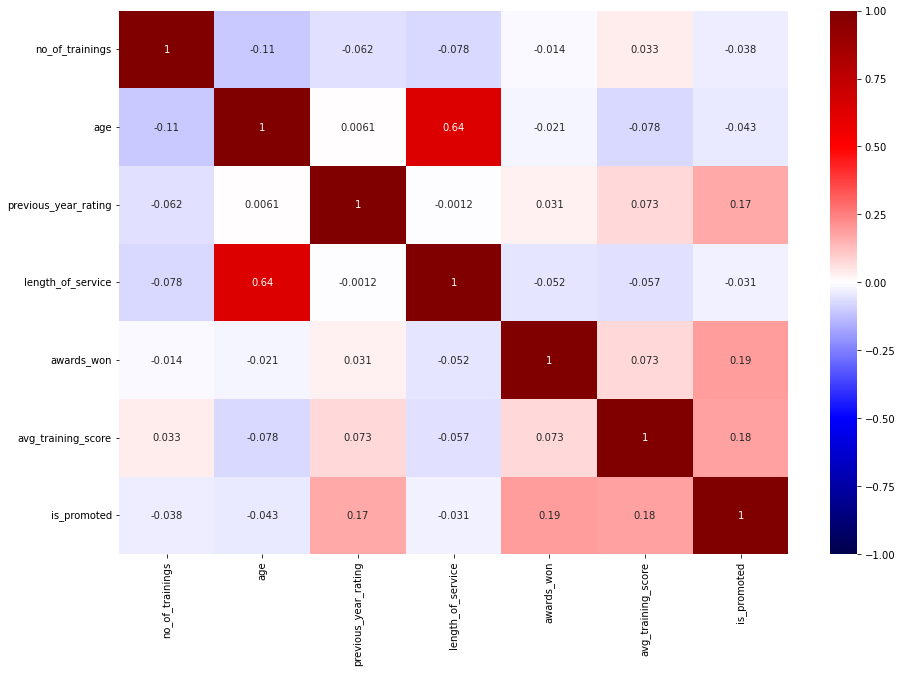

In [39]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [17]:
#parchart for Education

In [18]:
#parchart for Department

# Pre-proccessing:

In [40]:
df = pd.get_dummies(df) #convert all categorical data to numeric
df

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1,30,5.0,4,0,60,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,34,3.0,7,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,45,3.0,2,0,73,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
54803,1,48,3.0,17,0,78,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
54804,1,37,2.0,6,0,56,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
54805,1,27,5.0,3,0,79,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45607 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               45607 non-null  int64  
 1   age                           45607 non-null  int64  
 2   previous_year_rating          43328 non-null  float64
 3   length_of_service             45607 non-null  int64  
 4   awards_won                    45607 non-null  int64  
 5   avg_training_score            45607 non-null  int64  
 6   is_promoted                   45607 non-null  int64  
 7   department_Analytics          45607 non-null  uint8  
 8   department_Finance            45607 non-null  uint8  
 9   department_HR                 45607 non-null  uint8  
 10  department_Legal              45607 non-null  uint8  
 11  department_Operations         45607 non-null  uint8  
 12  department_Procurement        45607 non-null  uint8  
 13  d

# Split X & Y

In [43]:
X, y = df.drop('is_promoted',axis=1), df['is_promoted']

In [51]:
X

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,1,35,5.0,8,0,49,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1,30,5.0,4,0,60,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,34,3.0,7,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,2,39,1.0,10,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,2,31,1.0,2,0,49,0,0,0,0,0,0,0,1,0,1,0,0,0,1
54803,1,48,3.0,17,0,78,0,0,0,0,0,0,0,0,1,1,0,0,0,1
54804,1,37,2.0,6,0,56,0,0,0,0,1,0,0,0,0,0,0,1,1,0
54805,1,27,5.0,3,0,79,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54802    0
54803    0
54804    0
54805    0
54807    0
Name: is_promoted, Length: 45607, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.isna().sum()

no_of_trainings                    0
age                                0
previous_year_rating            1832
length_of_service                  0
awards_won                         0
avg_training_score                 0
department_Analytics               0
department_Finance                 0
department_HR                      0
department_Legal                   0
department_Operations              0
department_Procurement             0
department_R&D                     0
department_Sales & Marketing       0
department_Technology              0
education_Bachelor's               0
education_Below Secondary          0
education_Master's & above         0
gender_f                           0
gender_m                           0
dtype: int64

In [55]:
X_test.isna().sum()

no_of_trainings                   0
age                               0
previous_year_rating            447
length_of_service                 0
awards_won                        0
avg_training_score                0
department_Analytics              0
department_Finance                0
department_HR                     0
department_Legal                  0
department_Operations             0
department_Procurement            0
department_R&D                    0
department_Sales & Marketing      0
department_Technology             0
education_Bachelor's              0
education_Below Secondary         0
education_Master's & above        0
gender_f                          0
gender_m                          0
dtype: int64

In [57]:
X_train['previous_year_rating'].fillna(value= X_train['previous_year_rating'].mean(),inplace = True )
X_test['previous_year_rating'].fillna(value= X_train['previous_year_rating'].mean(),inplace = True )

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36485 entries, 4910 to 17485
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               36485 non-null  int64  
 1   age                           36485 non-null  int64  
 2   previous_year_rating          36485 non-null  float64
 3   length_of_service             36485 non-null  int64  
 4   awards_won                    36485 non-null  int64  
 5   avg_training_score            36485 non-null  int64  
 6   department_Analytics          36485 non-null  uint8  
 7   department_Finance            36485 non-null  uint8  
 8   department_HR                 36485 non-null  uint8  
 9   department_Legal              36485 non-null  uint8  
 10  department_Operations         36485 non-null  uint8  
 11  department_Procurement        36485 non-null  uint8  
 12  department_R&D                36485 non-null  uint8  
 13

In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9122 entries, 6572 to 54800
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               9122 non-null   int64  
 1   age                           9122 non-null   int64  
 2   previous_year_rating          9122 non-null   float64
 3   length_of_service             9122 non-null   int64  
 4   awards_won                    9122 non-null   int64  
 5   avg_training_score            9122 non-null   int64  
 6   department_Analytics          9122 non-null   uint8  
 7   department_Finance            9122 non-null   uint8  
 8   department_HR                 9122 non-null   uint8  
 9   department_Legal              9122 non-null   uint8  
 10  department_Operations         9122 non-null   uint8  
 11  department_Procurement        9122 non-null   uint8  
 12  department_R&D                9122 non-null   uint8  
 13 

# KNN Model:

### Now we try to use KNN model..

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 10))
weight_options = ['uniform', 'distance']

In [62]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)

In [ ]:
#mymodel = KNeighborsClassifier()

#param_grid = dict(n_neighbors=k_range, weights=weight_options)
 
#grid = GridSearchCV(mymodel , param_grid, cv=10, scoring='accuracy')

#grid.fit(X_train, y_train)
 
    
# هنا كان يشرح لي باترك ماعليكم من هالكود..    

In [63]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [64]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 9, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=9)
Best score:  0.9111963578702168


In [67]:
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9139098259558722

In [34]:
#knn.predict() 

In [35]:
y_train.value_counts() #impalance

0    32867
1     3618
Name: is_promoted, dtype: int64

# fix the impalance data

In [73]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [76]:
from imblearn.over_sampling import SMOTE


In [77]:
# X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

oversample = SMOTE() 
X_train_smote, y_train_smote = oversample.fit_resample(X_train.astype('float'),y_train)

In [78]:
y_train_smote.value_counts()

0    32867
1    32867
Name: is_promoted, dtype: int64

In [83]:
knn.fit(X_train_smote, y_train_smote)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6852663889497917


col_0,0,1
is_promoted,,
0,5752,2506
1,365,499


In [84]:
5752/8258

0.6965366916929039

In [58]:
import imblearn.over_sampling #To solve impalance

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 9, 0 : n_neg} #duplicate (is_promoted when is positive (1)) 

ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) # To duplicate small class

X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train) #here duplicate is Done 


In [59]:
y_tr_rs.value_counts() #Now is palance

0    32867
1    32562
Name: is_promoted, dtype: int64

In [62]:
knn1 = KNeighborsClassifier(n_neighbors=9, weights='uniform') #After do palance
knn1.fit(X_tr_rs, y_tr_rs)
knn1.score(X_tr_rs, y_tr_rs)

0.8774702349111251

In [63]:
knn1.score(X_test, y_test) # overfitting!!! use anather model or change parameters

0.6979828984871739